In [ ]:
# 단계1. 다음 Data_Set을 x_data 와 y_data 로 분리하세요
# 예
# data = [
#    [0.72,0.82,-1],
#    [0.91,-0.69,-1]
#    ]

# x_data = [[0.72,0.82],[0.91,-0.69]]
# y_data = [[-1],[-1]]

# 단계2. 분리한 데이터를 plt 로 표현해 보세요

# 단계3. 적당한 model을 만들어 이진분류 해보세요. 


In [60]:
data = [
    [0.72,0.82,-1],
    [0.91,-0.69,-1],
    [0.03,0.93,-1],
    [0.12,0.25,-1],
    [0.96,0.47,-1],
    [0.8,-0.75,-1],
    [0.46,0.98,-1],
    [0.66,0.24,-1],
    [0.72,-0.15,-1],
    [0.35,0.01,-1],
    [-0.11,0.1,1],
    [0.31,-0.96,1],
    [0.0,-0.26,1],
    [-0.43,-0.65,1],
    [0.57,-0.97,1],
    [-0.72,-0.64,1],
    [-0.25,-0.43,1],
    [-0.12,-0.9,1],
    [-0.58,0.62,1],
    [-0.77,-0.76,1]
]

In [61]:
import numpy as np

In [62]:
data = np.array(data)

In [63]:
data.shape

(20, 3)

In [64]:
x_data = data[:, 0:2]
y_data = data[:, 2:]

In [13]:
x_data.shape

(20, 2)

In [14]:
y_data.shape

(20, 1)

In [26]:
# y_data = (y_data+1)/2

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y_data)
y_data = scaler.transform(y_data)

In [66]:
y_data

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [67]:
scaler.inverse_transform(y_data)

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [46]:
import matplotlib.pyplot as plt

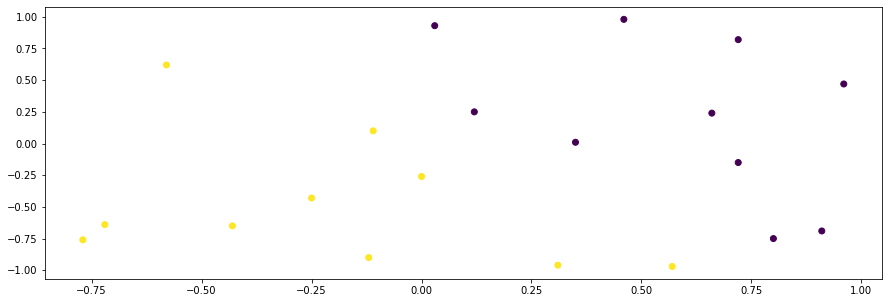

In [47]:
plt.scatter(x_data[:,0],x_data[:,1], c=y_data)

In [48]:
import tensorflow as tf

In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,)))

In [50]:
model.compile(optimizer="sgd", loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
history = model.fit(x_data, y_data, batch_size=20, epochs = 1500)

Epoch 1/1500
1/1 [==============================] - 0s 283ms/step - loss: 0.8735 - accuracy: 0.2000
Epoch 2/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.8724 - accuracy: 0.2000
Epoch 3/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.8714 - accuracy: 0.2000
Epoch 4/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.8703 - accuracy: 0.2000
Epoch 5/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.8692 - accuracy: 0.2000
Epoch 6/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.8682 - accuracy: 0.2000
Epoch 7/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.8671 - accuracy: 0.2000
Epoch 8/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.8661 - accuracy: 0.2000
Epoch 9/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.8650 - accuracy: 0.2000
Epoch 10/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.8639 - accuracy: 0.2000
Epoch 11/1500
1/

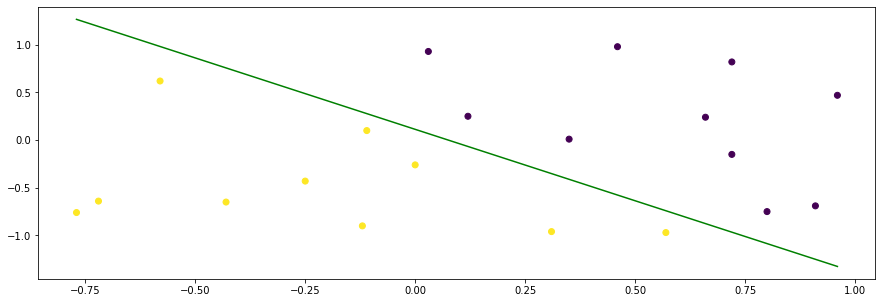

In [52]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
x = np.linspace(np.amin(x_data[:,:1]),np.amax(x_data[:,:1]))

a = -weights[0]/weights[1]
b = -biases[0]/weights[1] 


plt.rcParams["figure.figsize"] = (15,5)
plt.plot(x, [a*i + b for i in x], color='green')

plt.show()

In [56]:
scaler.inverse_transform(np.round(model.predict(x_data)))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [68]:
scaler.inverse_transform(y_data)

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])